# N-Gram

In [4]:
# Imorting some important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(style='seaborn')

C:\Users\chira\AppData\Local\Temp\ipykernel_15440\1711773863.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style='seaborn')


## A simple example of `Unigram`

In [2]:
from nltk import ngrams
sentence = 'I reside in Bengaluru.'
n = 1
unigrams = ngrams(sentence.split(), n)
for grams in unigrams:
  print (grams)

('I',)
('reside',)
('in',)
('Bengaluru.',)


## Explaining `Unigram` on a dataframe (.csv file)

In [10]:
df=pd.read_csv('all-data.csv',encoding = "ISO-8859-1", header = None, names = ['sentiment', 'text'])
df.head()

,sentiment,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4846 non-null   object
 1   text       4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [12]:
df.isna().sum()

sentiment    0
text         0
dtype: int64

In [14]:
# Counting the values for each sentiment
df['sentiment'].value_counts()

sentiment
neutral     2879
positive    1363
negative     604
Name: count, dtype: int64

In [15]:
y=df['sentiment'].values
y.shape

(4846,)

In [16]:
x=df['text'].values

In [17]:
x.shape

(4846,)

In [18]:
from sklearn.model_selection import train_test_split

In [20]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.4)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((2907,), (2907,), (1939,), (1939,))

In [21]:
df_x_train=pd.DataFrame(x_train)
df_x_train=df_x_train.rename(columns={0:'news'})

In [22]:
df_y_train=pd.DataFrame(y_train)
df_y_train=df_y_train.rename(columns={0:'sentiment'})
df_train=pd.concat([df_x_train,df_y_train],axis=1)

In [23]:
df_train.head()

,news,sentiment
0,"( ADP News ) - Oct 31 , 2008 - Finnish food co...",positive
1,Mercator will use the software for its logisti...,neutral
2,Nokia - the world 's largest mobile phone manu...,positive
3,"Operating profit totaled EUR 5.5 mn , up from ...",positive
4,The board of directors also proposed that a di...,neutral


In [24]:
df_x_test=pd.DataFrame(x_test)
df_x_test=df_x_test.rename(columns={0:'news'})

In [25]:
df_y_test=pd.DataFrame(y_test)
df_y_test=df_y_test.rename(columns={0:'sentiment'})
df_test=pd.concat([df_x_test,df_y_test],axis=1)

In [26]:
df_test.head()

,news,sentiment
0,In 2007 Etteplan reported a turnover of EUR125...,neutral
1,Bovine slaughtering and cutting at the Kuopio ...,neutral
2,The continued operations mean the structure af...,neutral
3,The company expects its net sales for the whol...,neutral
4,This would be a huge process .,neutral


In [27]:
#removing punctuations
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
#defining the function to remove punctuation
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""  
  for i in text:     
    if i not in string.punctuation:
      ans+=i    
  return ans

In [29]:
#storing the puntuation free text in a new column called clean_msg
df_train['news']= df_train['news'].apply(lambda x:remove_punctuation(x))
df_test['news']= df_test['news'].apply(lambda x:remove_punctuation(x))

In [30]:
df_train.head()
#punctuations are removed from news column in train dataset

,news,sentiment
0,ADP News Oct 31 2008 Finnish food company...,positive
1,Mercator will use the software for its logisti...,neutral
2,Nokia the world s largest mobile phone manufa...,positive
3,Operating profit totaled EUR 55 mn up from EU...,positive
4,The board of directors also proposed that a di...,neutral


In [31]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chira\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [32]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)

In [33]:
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [34]:
#sample!
generate_N_grams("The sun rises in the east",2)

Sentence after removing stopwords: ['The', 'sun', 'rises', 'east']


['The sun', 'sun rises', 'rises east']

In [35]:
from collections import defaultdict

In [36]:
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [37]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

Sentence after removing stopwords: ['', 'ADP', 'News', '', '', 'Oct', '31', '', '2008', '', 'Finnish', 'food', 'company', 'Raisio', 'Oyj', '', 'OMX', '', 'RAIVV', '', 'said', 'today', 'net', 'profit', 'jumped', 'EUR', '164', 'million', '', 'USD', '209', '', 'first', 'nine', 'months', '2008', 'EUR', '11', 'million', 'period', '2']
Sentence after removing stopwords: ['Nokia', '', 'world', 'largest', 'mobile', 'phone', 'manufacturer', '', 'China', 'Postel', '', 'China', 'largest', 'mobile', 'phone', 'distributor', '', 'longstanding', 'partnership', 'continues', 'grow', 'stronger', 'time', '']
Sentence after removing stopwords: ['Operating', 'profit', 'totaled', 'EUR', '55', 'mn', '', 'EUR', '07', 'mn', '']
Sentence after removing stopwords: ['', 'Lietuvos', 'Respublikos', 'sveikatos', 'apsaugos', 'ministerija', 'awarded', 'contract', 'UAB', '', 'AFFECTO', 'LIETUVA', '', 'financial', 'systems', 'software', 'package', '']
Sentence after removing stopwords: ['Finnish', 'financial', 'group', 

In [38]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

Sentence after removing stopwords: ['Finnlines', 'estimated', 'annual', 'general', 'meeting', '2008', 'financially', 'tough', 'year', 'due', 'large', 'investments', '']
Sentence after removing stopwords: ['Rivals', 'say', 'Qualcomm', 'fewer', 'patents', '3G', 'phones', 'earlier', 'versions', 'lower', 'rates', '']
Sentence after removing stopwords: ['The', 'OMX', 'Helsinki', 'index', '034', 'pct', '825602', 'turnover', '813191', 'mln', 'eur', '']
Sentence after removing stopwords: ['The', 'administrators', 'indicated', 'need', '900', 'job', 'cuts', 'Irish', 'insurer', 'next', '15', 'months', '']
Sentence after removing stopwords: ['Finnish', 'Suominen', 'Flexible', 'Packaging', 'Ltd', '', 'owned', 'local', 'textile', 'company', 'Suominen', 'Corporation', 'Group', '', 'HEL', '', 'SUY1V', '', '', 'said', 'today', 'would', 'start', 'employee', 'negotiations', 'concerning', 'entire', 'personnel', 'Finland', '']
Sentence after removing stopwords: ['Operating', 'result', '', 'excluding', 'one

In [39]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

Sentence after removing stopwords: ['Mercator', 'use', 'software', 'logistic', '', 'retail', 'wholesale', 'operations', 'Slovenia', 'markets', 'southeastern', 'Europe', '']
Sentence after removing stopwords: ['The', 'board', 'directors', 'also', 'proposed', 'dividend', 'EUR0', '20', 'per', 'outstanding', 'share', 'paid', '']
Sentence after removing stopwords: ['Total', 'two', 'offers', 'received', 'Contracting', 'Authority', 'participating', 'contract', '', 'however', 'contract', 'allotted', 'Affecto', 'Finland', 'Oy', '']
Sentence after removing stopwords: ['Mr', 'Koistinen', 'joins', 'Nokia', 'Siemens', 'Networks', 'held', 'various', 'senior', 'sales', 'management', 'business', 'development', 'positions', 'since', '1997', '']
Sentence after removing stopwords: ['The', 'sale', 'allow', 'Campofrio', 'focus', 'recently', 'announced', 'takeover', 'Groupe', 'Smithfield', 'Holdings', '', 'European', 'unit', 'Smithfield', 'Foods', 'Inc', '', 'SFD', '', 'US']
Sentence after removing stopword

In [40]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

In [41]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

In [42]:
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

In [43]:
nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]

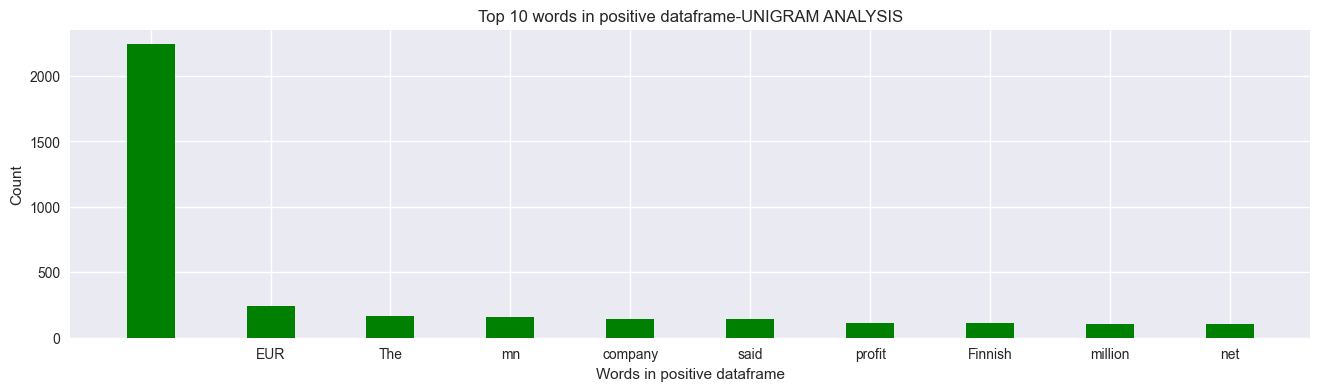

In [44]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

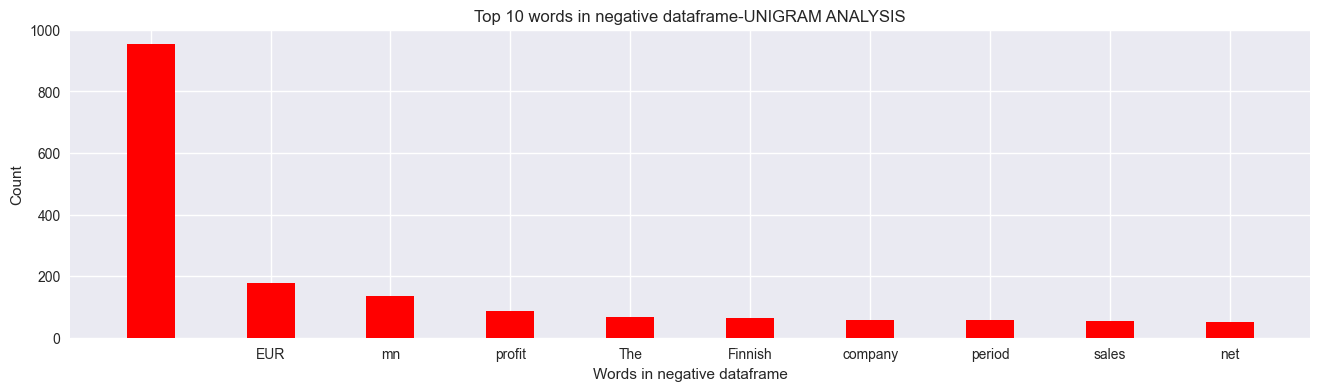

In [45]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

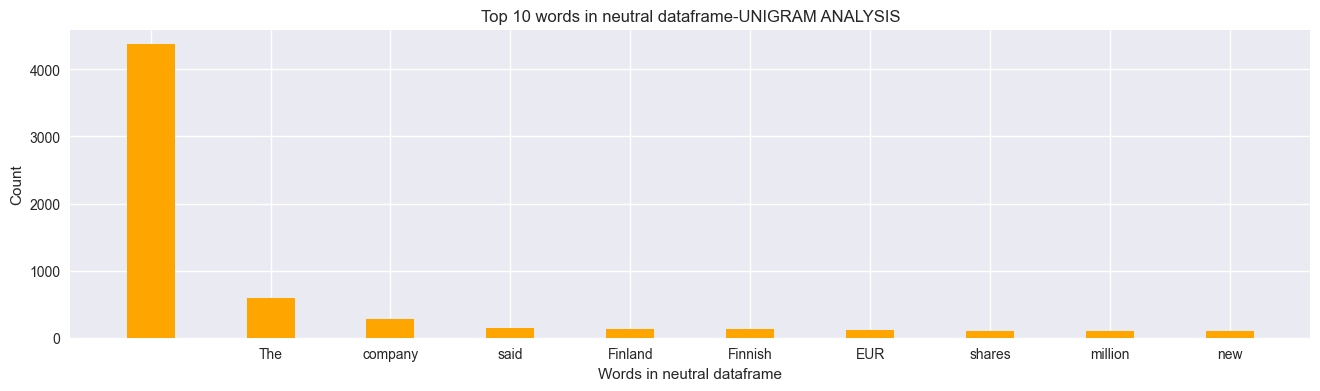

In [46]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1,nud2, color ='orange',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")

plt.title("Top 10 words in neutral dataframe-UNIGRAM ANALYSIS")
plt.savefig("neutral-unigram.png")

plt.show()